In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  sklearn import datasets, linear_model, model_selection, __version__
print("sklearn.__version__ is ", __version__)

sklearn.__version__ is  1.1.3


In [41]:
# load linnerud data from the datasets and assign to X,y

X, y = datasets.load_linnerud(return_X_y=True)
linnerud = datasets.load_linnerud()
print(X.shape)
print(linnerud.feature_names)

(20, 3)
['Chins', 'Situps', 'Jumps']


In [42]:
# prepare for plot and regression with numpy newaxis
x_df = pd.DataFrame(X)
situps = x_df[1]    # Get the sit up column

In [43]:
# prepare for plot and regression with numpy newaxis
x_df = pd.DataFrame(X)
situps = x_df[1]    # Get the sit up column
situps_np = situps.values
situps_np = situps_np[:, np.newaxis] # add an axis to make the array 2D instead of 1D
print("situps: ", situps)

y_df = pd.DataFrame(y)
waistline = y_df[1]    # Get the sit up column
waistline_np = waistline.values
waistline_np = waistline_np[:, np.newaxis] # add an axis to make the array 2D instead of 1D
print("waistline: ", waistline)
#X = X[:, np.newaxis, 2]
#y = y[:, np.newaxis, 2]
#print(X.shape)
#print(y.shape)

situps:  0     162.0
1     110.0
2     101.0
3     105.0
4     155.0
5     101.0
6     101.0
7     125.0
8     200.0
9     251.0
10    120.0
11    210.0
12    215.0
13     50.0
14     70.0
15    210.0
16     60.0
17    230.0
18    225.0
19    110.0
Name: 1, dtype: float64
waistline:  0     36.0
1     37.0
2     38.0
3     35.0
4     35.0
5     36.0
6     38.0
7     34.0
8     31.0
9     33.0
10    34.0
11    33.0
12    34.0
13    46.0
14    36.0
15    37.0
16    37.0
17    32.0
18    33.0
19    33.0
Name: 1, dtype: float64


In [44]:
#train a linear regression model
X_train, X_test, y_train, y_test = model_selection.train_test_split(situps_np, waistline_np, test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# predictions on test data
y_pred = model.predict(X_test)

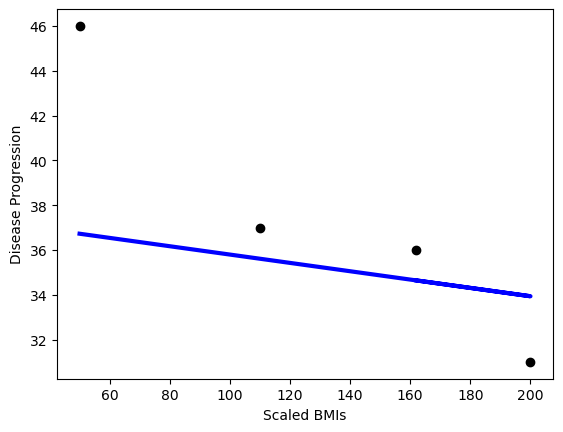

In [46]:
# plot the X_test and y_pred values
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 24.61
R-squared (R2): 0.16


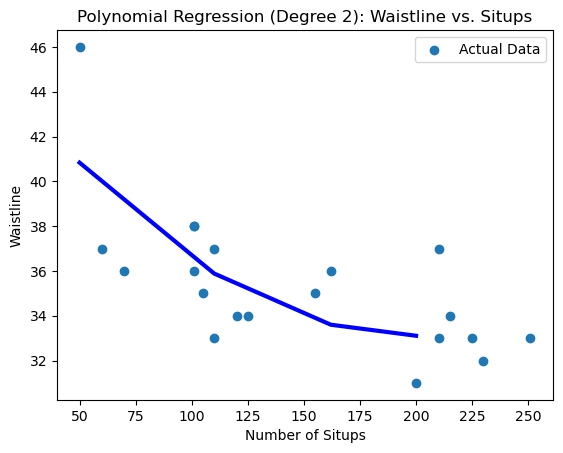

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
situps_poly = poly_features.fit_transform(situps_np)

# Create a polynomial regression model
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(situps_np, waistline_np)

# Predict waistline using the polynomial regression model
waistline_pred = polyreg.predict(situps_np)

# Plot the relationship between waistline and situps, including the regression curve
plt.scatter(situps_np, waistline_np, label='Actual Data')
plt.plot(sorted(X_test),polyreg.predict(sorted(X_test)), color='blue', linewidth=3)
plt.xlabel('Number of Situps')
plt.ylabel('Waistline')
plt.title(f'Polynomial Regression (Degree {degree}): Waistline vs. Situps')
plt.legend()
plt.show()